# How well do jobs and skills pay for Data Analysts?

## Methology

   1. Evaluate median salary for top 6 data jobs
   2. Find median salary per skill for Data Analysts
   3. Visualize for highest paying skills and most demanded skills


In [30]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns


# Load Data
df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_US = df[df.job_country == "United States"].dropna(subset=["salary_year_avg"])

In [32]:
job_titles = df_US.job_title_short.value_counts().index[:6].tolist()

In [33]:
# To use groupby change the type from list to dataframe
df_US_top6 = df_US[df_US.job_title_short.isin(job_titles)]
type(df_US_top6)

pandas.core.frame.DataFrame

In [34]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

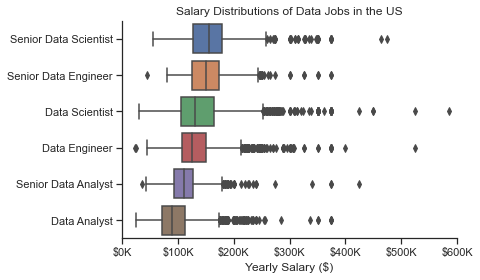

In [35]:
sns.boxplot(data= df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order)
sns.set_theme(style="ticks")
sns.despine()


plt.title("Salary Distributions of Data Jobs in the US")
plt.xlabel("Yearly Salary ($)")
plt.ylabel("")
plt.xlim(0, 600_000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()